In [16]:
import pandas as pd
import numpy as np
import imblearn
import seaborn as sns

In [17]:
data = pd.read_csv("/content/Creditcard_data.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


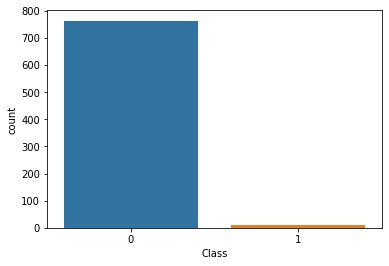

In [29]:
x = data.drop("Class", axis =1)
y = data["Class"]

sns.countplot(x=y)

original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape: Counter({0: 9, 1: 9})


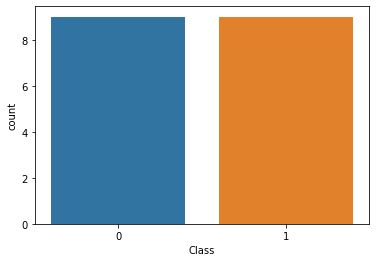

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

from collections import Counter
print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_rus))

sns.countplot(x=y_rus)


original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape: Counter({0: 9, 1: 9})


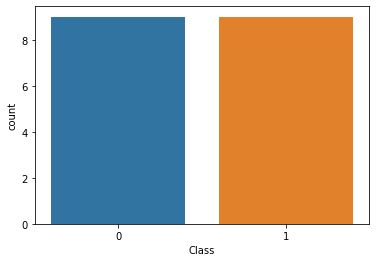

In [21]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
x_resampled, y_resampled = cc.fit_resample(x, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_resampled))

sns.countplot(x=y_resampled)

original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape: Counter({0: 9, 1: 9})


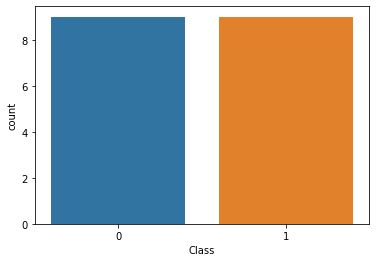

In [22]:
from imblearn.under_sampling import NearMiss
nm1 = NearMiss(version=1)
x_resampled_nm1, y_resampled_nm1 = nm1.fit_resample(x, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_resampled_nm1))

sns.countplot(x=y_resampled_nm1)

original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape: Counter({0: 763, 1: 763})


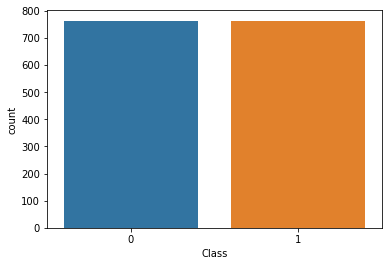

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(x, y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_ros))

sns.countplot(x=y_ros)

original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape: Counter({0: 763, 1: 763})
Resample dataset shape: Counter({1: 765, 0: 763})


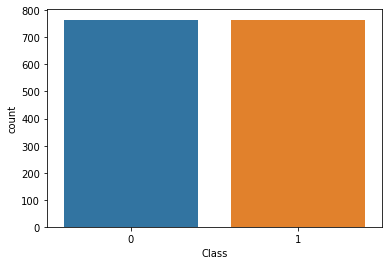

In [25]:
from imblearn.over_sampling import SMOTE
x_smote, y_smote = SMOTE().fit_resample(x, y)
x_adasyn, y_adasyn = ADASYN().fit_resample(x,y)
print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_smote))
print('Resample dataset shape:', Counter(y_adasyn))

sns.countplot(x=y_smote)


original dataset shape: Counter({0: 763, 1: 9})
Resample dataset shape: Counter({1: 765, 0: 763})


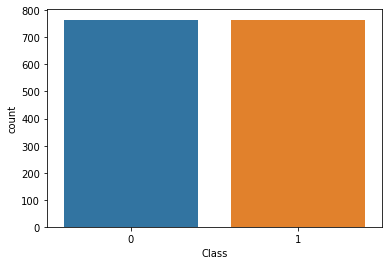

In [26]:
from imblearn.over_sampling import ADASYN

x_adasyn, y_adasyn = ADASYN().fit_resample(x,y)
print('original dataset shape:', Counter(y))

print('Resample dataset shape:', Counter(y_adasyn))

sns.countplot(x=y_adasyn)

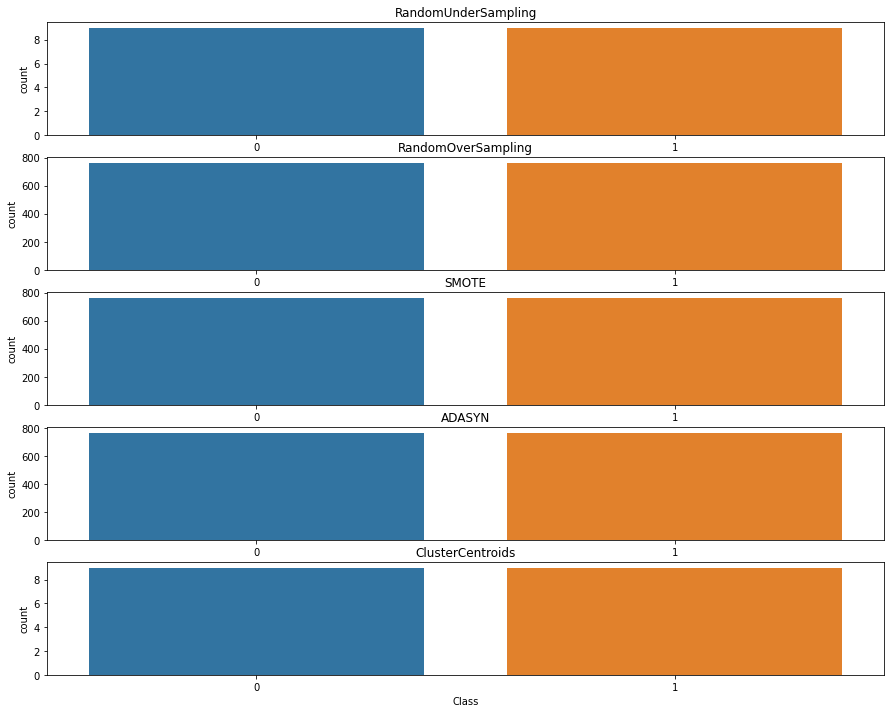

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,12))
plt.subplot(5,1,1)
plt.title("RandomUnderSampling")
sns.countplot(x=y_rus)

plt.subplot(5,1,2)
plt.title("RandomOverSampling")
sns.countplot(x=y_ros)

plt.subplot(5,1,3)
plt.title("SMOTE")
sns.countplot(x=y_smote)

plt.subplot(5,1,4)
plt.title("ADASYN")
sns.countplot(x=y_adasyn)

plt.subplot(5,1,5)
plt.title("ClusterCentroids")
sns.countplot(x=y_resampled)



In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    ExtraTreesClassifier(max_depth=5,n_estimators=10, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
]

# Define a function to train the data and print the accuracy, confusion matrix, and classification report
def train_model(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # Avoid warning of convergence
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_test, y_pred
sampled_data_names = ['ADASYN', 'SMOTE', 'ClusterCentroids', 'RandomUnderSampler', 'RandomOverSampler']
sampled_data = [x_adasyn, x_smote, x_resampled, x_rus, x_ros]
sampled_data_labels = [y_adasyn, y_smote, y_resampled, y_rus, y_ros]
model_names = ['KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'Naive Bayes']

predictions = pd.DataFrame()
predictions['Model'] = model_names


for i in range(len(sampled_data)):
    for j in range(len(classifiers)):
        y_test, y_pred = train_model(sampled_data[i], sampled_data_labels[i], classifiers[j])
        predictions.loc[j, sampled_data_names[i]] = accuracy_score(y_test, y_pred)

In [49]:
predictions

,Model,ADASYN,SMOTE,ClusterCentroids,RandomUnderSampler,RandomOverSampler
0,KNN,0.856209,0.879085,0.25,0.75,0.990196
1,SVM,0.643791,0.647059,0.00,0.00,1.000000
2,Logistic Regression,0.767974,0.705882,0.50,0.75,0.823529
3,Random Forest,0.983660,0.973856,1.00,0.25,1.000000
4,Naive Bayes,0.810458,0.859477,0.25,0.00,0.647059
